In [1]:
# importing the required libraries for the analysis

import pandas as pd                          # for data maniulation 
import numpy as np                           # for numerical operations
import matplotlib.pyplot as plt              # for visualization 
import seaborn as sns                        # for statistical visualization
import re                                    # for string manipulation
from PIL import Image                        # for image processing
from wordcloud import WordCloud, STOPWORDS   # for generating word clouds
import nltk 
from nltk.stem import WordNetLemmatizer      # comprehensive toolkit for symbolic and statistical NLP
from nltk.corpus import stopwords            # for dealing with stopwords
from nltk.tokenize import word_tokenize      # for tokenization
from textblob import TextBlob                # for providing simple API for common NLP tasks  
import emoji                                 # for dealing with emojis
import unicodedata                           # for determining the category of a character and filter out emojis 
import warnings                              # to ignore warnings
import string                                # for string manipulation
warnings.filterwarnings('ignore')            # ignore warnings during execution

In [2]:
# loading the datasets from the 'csv' file
df1 = pd.read_csv("reddit_depression_suicidewatch.csv")

In [3]:
df = df1.copy()

In [4]:
df1.head()

,text,label
0,I recently went through a breakup and she said...,depression
1,"I do not know how to navigate these feelings, ...",depression
2,"So I have been with my bf for 5 months , and h...",depression
3,I am so exhausted of this. Just when I think I...,SuicideWatch
4,I have been severly bullied since i was 5 till...,depression


In [5]:
# Shape (rows and columns) of the dataset

color = "\033[91m"
b_color = "\033[0m"

print(color + "\n*** SHAPE of DATASET 1 ***\n" + b_color)
print(f"Number of rows:  \t{df1.shape[0]}")
print(f"Number of columns:\t{df1.shape[1]}")
print(f"Shape (rows, columns): {df1.shape}")


*** SHAPE of DATASET 1 ***

Number of rows:  	20363
Number of columns:	2
Shape (rows, columns): (20363, 2)


In [6]:
# checking the column names of dataset

color = "\033[38;2;139;69;19m"

print(color + '\n*** Columns in Dataframe 1 ***\n\n' + b_color, df1.columns)


*** Columns in Dataframe 1 ***

 Index(['text', 'label'], dtype='object')


In [7]:
color = "\033[95m"
print(color + "\n*** Information of Dataset 1 ***\n" + b_color)
print(df1.info())


*** Information of Dataset 1 ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20363 entries, 0 to 20362
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20363 non-null  object
 1   label   20363 non-null  object
dtypes: object(2)
memory usage: 318.3+ KB
None


In [8]:
color = "\033[94m"
print(color + "\n*** Null values in Dataset 1 ***\n" + b_color)
print(df1.isnull().sum())


*** Null values in Dataset 1 ***

text     0
label    0
dtype: int64


In [9]:
# Checking the unique values in each column
color = "\033[38;2;139;69;19m"
for i in df1:
    print(color + f"\nUnique values in '{i}' column:\n" + b_color)
    print(df1[i].unique(), end = '\n\n')


Unique values in 'text' column:

['I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?'
 'I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was 

In [10]:
print(f'\033[0mNumber of duplicate entries in the dataset are: \033[94m{df1.duplicated().sum()}')

Number of duplicate entries in the dataset are: 8


In [11]:
# Visualize some duplicated rows
df1[df1.duplicated()].head()

,text,label
3692,Why has my appetite vanished completely? On mo...,depression
3799,I just turned 18 and feel like I have wasted m...,depression
4947,Why am I just never good enough? I had a prett...,depression
8188,"I am a 24 year old female, I have been diagnos...",depression
9111,I feel like I have tried every medication over...,depression


In [12]:
# Let's get rid of duplicate entries

df1.drop_duplicates(keep = 'first', inplace = True)

# Again check the dataset shape, after removing the duplicate entries

print(f'\033[94mNumber of records (rows) in the dataset are: \033[0m{df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: \033[0m{df.shape[1]}')

Number of records (rows) in the dataset are: 20363
Number of features (columns) in the dataset are: 2


In [31]:
class TextPreprocessor:
    def __init__(self):
        pass
    @staticmethod
    def remove_stopwords(df, column):
        s_words = list(stopwords.words('english'))
        extra_s = ["what", "us", "this", "well", "there", "much", "us", "and", "you're", "in", "where", "when", "just", "how",
                   "is", "ha", "re", "are", "hi", "aren't", 'couldn', 'could', 'couldnt', "couldn't", 'did', 'had', 'have',
                   'must', 'does', 'should', 'was', "it's", "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't", 
                   "isn't", 'let', 'll', "may", 'were', 'is', 'has', 'must', 'mustn', 'rt', 'shan', 'shouldn', 'wasn', 'weren',
                   'httpstco', 'PAW PAW', 'PAW', 'won', 'wouldn','realli', 'now', 'got', 'man', 'people', 'a', "i", "he's",
                   'becaus','caus',"one","im","guy","someone","two",'read', "nearby", "she's","we","it","they","wouldn’t","i've",
                   'publications', 'publication','aren', 'didn', 'doesn', 'don','amazon','good', 'content', 'hadn', 'hasn','star', 'haven',
                   'isn','great', 'subscription', 'sdidn', 've','article','subscribe', 'articles',"will","magazine","magazines","author",
                   'writer','review','pages','issue','document',"httpstco",'PAW PAW','PAW']
        
        stop_words = list(STOPWORDS) + list(s_words) + list(extra_s)
        
        df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
    @staticmethod
    def word_cloud(text):
        s_words = list(stopwords.words('english'))
        extra_s = ["what", "us", "this","well","there","much","us","and","you're","in","where","when","just","how","is","ha","re","are",
                   "hi","aren't", 'couldn','could','couldnt',"couldn't",'did','had','have','must','does','should','was',"it's",
                   "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't", "isn't", 'let', 'll',"may",'were','is','has','must',
                   'mustn', 'rt', 'shan', 'shouldn', 'wasn', 'weren','httpstco','PAW PAW','PAW', 'won', 'wouldn','realli','now','got','man','people','a',
                   'becaus','caus',"one","im","guy","someone","two",'read', "nearby","i","he's","she's","we","it","they","wouldn’t","i've",
                   'publications', 'publication','aren', 'didn', 'doesn', 'don','amazon','good', 'content', 'hadn', 'hasn','star', 'haven',
                   'isn','great', 'subscription', 'sdidn', 've','article','subscribe', 'articles',"will","magazine","magazines","author",
                   'writer','review','pages','issue','document',"httpstco","life","know",'PAW PAW','PAW']
        
        stop_words = list(STOPWORDS) + list(s_words) + list(extra_s)
        
        word_cloud = WordCloud(width = 750, height = 550,
                               background_color = 'black',
                               stopwords = stop_words,
                               min_font_size = 12).generate_from_text(text)
        
        plt.figure(figsize = (8, 6))
        plt.imshow(word_cloud)
        plt.axis("off")
        plt.show()
        
    @staticmethod
    def lemmatize(df, column):
        lemmatizer = WordNetLemmatizer()
        df[column] = df[column].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    @staticmethod
    def remove_emoji(df, column):
        df[column] = df[column].apply(lambda x: ' '.join([emoji.replace_emoji(word, replace = '') for word in x.split()]))
    @staticmethod
    def punctuator(df, column):
        df[column] = df[column].apply(lambda x: str(x).translate(str.maketrans('', '', string.punctuation)))
    @staticmethod
    def remove_digits(df, column):
        df[column] = df[column].apply(lambda x: ' '.join(''.join(char if char.isalpha() or char.isspace() else ' ' for char in word) for word in str(x).split()))
    @staticmethod
    def remove_meaningless(df, column):
        df[column] = df[column].apply(lambda x: ' '.join([str(TextBlob(word).correct()) for word in x.split()]))
    @staticmethod
    #Function to check alphabet recurring more than twice
    def remove_len(df, column):
        p = re.compile(r'(.)\1{2,}')
        df[column] = df[column].apply(lambda x: ' '.join([p.sub('',word) for word in x.split()]))
    @staticmethod
    def remove_urls (df, column):
        p = re.compile(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b')
        df[column] = df[column].apply(lambda x: ' '.join([p.sub('',word) for word in x.split()]))

In [32]:
text_processor = TextPreprocessor()
df1['Cleaned_Text'] = df1['text']
text_processor.remove_len(df1, 'Cleaned_Text')
text_processor.remove_stopwords(df1, 'Cleaned_Text')
text_processor.lemmatize(df1, 'Cleaned_Text')
text_processor.remove_emoji(df1, 'Cleaned_Text')
text_processor.punctuator(df1, 'Cleaned_Text')
text_processor.remove_digits(df1, 'Cleaned_Text')
text_processor.remove_urls(df1, 'Cleaned_Text')

In [33]:
df1['Cleaned_Text'].head()

0    recently went breakup said still want friend s...
1    know navigate feelings new feeling stretch und...
2    bf month already told depressed week nothing p...
3    exhausted this think finally rest think maybe ...
4    severly bullied till resulted depressed misant...
Name: Cleaned_Text, dtype: object

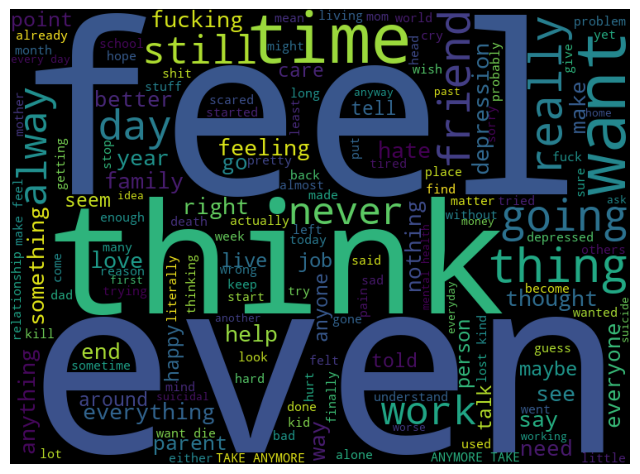

In [34]:
text_processor.word_cloud(''.join(x for x in [word for word in df1['Cleaned_Text']]))

C:\Users\gurut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


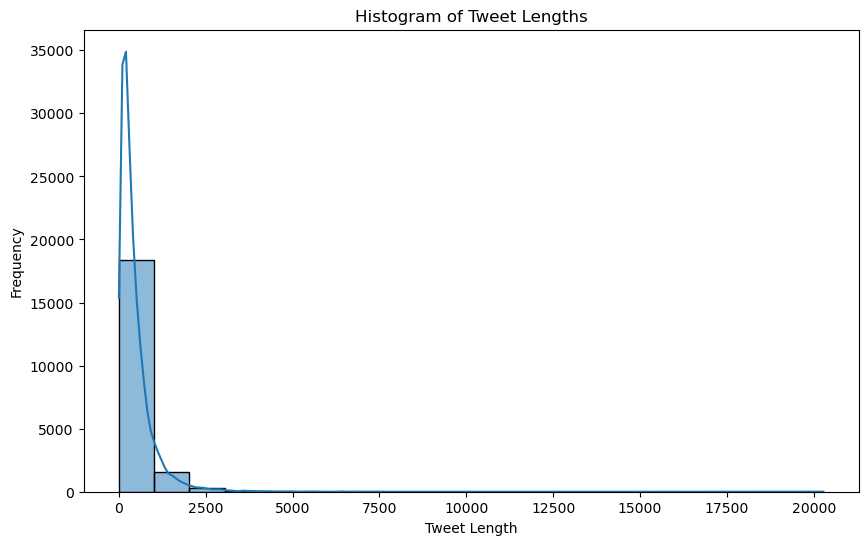

In [35]:
tweet_lengths = df1['Cleaned_Text'].apply(len)
plt.figure(figsize = (10, 6))
sns.histplot(tweet_lengths, bins = 20, kde = True)
plt.title('Histogram of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer   

bow_vectorizer = CountVectorizer( lowercase=True, max_df=0.5, min_df=10)
bow_matrix = bow_vectorizer.fit_transform(df1["Cleaned_Text"])

In [37]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda_bow  = LDA(n_components=5, random_state=42) 
lda_bow.fit(bow_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [38]:
for idx, topic in enumerate(lda_bow.components_):
    print(f"Top 5 words in Topic #{idx}:")
    print([bow_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]]) 
    print('')

Top 5 words in Topic #0:
['job', 'work', 'feel', 'time', 'year']

Top 5 words in Topic #1:
['die', 'know', 'life', 'feel', 'want']

Top 5 words in Topic #2:
['mom', 'fuck', 'shit', 'me', 'fucking']

Top 5 words in Topic #3:
['know', 'thing', 'want', 'feel', 'life']

Top 5 words in Topic #4:
['anymore', 'really', 'friend', 'know', 'feel']

